# Natural Language Processing using NLTK

In [1]:
# Install NLTK - pip install nltk
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /projects/820ea3ac-497c-43f
[nltk_data]     d-9cb7-abe34292faa8/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /projects/820ea3ac-497c-43fd-
[nltk_data]     9cb7-abe34292faa8/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## NLP Part 0 - Get some Data!

In [3]:
import urllib
import bs4 as bs
import re

In [4]:
# We will read the contents of the Wikipedia article "Global_warming" as an example, please feel free to use your own!
# We can open the page using "urllib.request.urlopen" then read it using ".read()"
source = urllib.request.urlopen('https://en.wikipedia.org/wiki/Barack_Obama').read()

# Beautiful Soup is a Python library for pulling data out of HTML and XML files.
# you may need to install a parser library --> "!pip3 install lxml"
# Parsing the data/creating BeautifulSoup object

soup = bs.BeautifulSoup(source,"html.parser") 

# Fetching the data
text = ""
for paragraph in soup.find_all('p'): #The <p> tag defines a paragraph in the webpages
    text += paragraph.text

# Preprocessing the data
text = re.sub(r'\[[0-9]*\]',' ',text) # [0-9]* --> Matches zero or more repetitions of any digit from 0 to 9
text = text.lower() #everything to lowercase
text = re.sub(r'\W^.?!',' ',text) # \W --> Matches any character which is not a word character except (.?!)
text = re.sub(r'\d',' ',text) # \d --> Matches any decimal digit
text = re.sub(r'\s+',' ',text) # \s --> Matches any characters that are considered whitespace (Ex: [\t\n\r\f\v].)

In [5]:
text[:100]

' barack hussein obama ii (/bəˈrɑːk huːˈseɪn oʊˈbɑːmə/ (listen) bə-rahk hoo-sayn oh-bah-mə; born augu'

## NLP Part 1 - Tokenization of paragraphs/sentences

In [6]:
# Tokenizing sentences
sentences = nltk.sent_tokenize(text) #tokenizing or splitting a string, text into a list of sentences.

In [7]:
print(sentences[:10])

[' barack hussein obama ii (/bəˈrɑːk huːˈseɪn oʊˈbɑːmə/ (listen) bə-rahk hoo-sayn oh-bah-mə; born august , ) is an american politician who served as the th president of the united states from to .', 'he was the first african-american president of the united states.', 'a member of the democratic party, he previously served as a u.s. senator from illinois from to and as an illinois state senator from to .', 'obama was born in honolulu, hawaii.', 'after graduating from columbia university in , he worked as a community organizer in chicago.', 'in , he enrolled in harvard law school, where he was the first black president of the harvard law review.', 'after graduating, he became a civil rights attorney and an academic, teaching constitutional law at the university of chicago law school from to .', 'turning to elective politics, he represented the th district in the illinois senate from until , when he ran for the u.s. senate.', 'obama received national attention in with his march senate pri

In [8]:
# Tokenizing words
all_words = nltk.word_tokenize(text) #tokenizing or splitting a string, text into a list of words.

In [9]:
print(all_words[:10])

['barack', 'hussein', 'obama', 'ii', '(', '/bəˈrɑːk', 'huːˈseɪn', 'oʊˈbɑːmə/', '(', 'listen']


## NLP Part 2 - Stopwords and Punctuation

In [10]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /projects/820ea3ac-497c-4
[nltk_data]     3fd-9cb7-abe34292faa8/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [11]:
# Removing stopwords
def remove_stopwords(sentences):
    for i in range(len(sentences)):
        words = nltk.word_tokenize(sentences[i])
        words = [word for word in words if word not in stopwords.words('english')]
        sentences[i] = ' '.join(words)
    return sentences
sentences = remove_stopwords(sentences)
print(sentences[:10]) #eliminating all stop words

['barack hussein obama ii ( /bəˈrɑːk huːˈseɪn oʊˈbɑːmə/ ( listen ) bə-rahk hoo-sayn oh-bah-mə ; born august , ) american politician served th president united states .', 'first african-american president united states .', 'member democratic party , previously served u.s. senator illinois illinois state senator .', 'obama born honolulu , hawaii .', 'graduating columbia university , worked community organizer chicago .', ', enrolled harvard law school , first black president harvard law review .', 'graduating , became civil rights attorney academic , teaching constitutional law university chicago law school .', 'turning elective politics , represented th district illinois senate , ran u.s. senate .', 'obama received national attention march senate primary win , well-received july democratic national convention keynote address , landslide november election senate .', ', year beginning campaign , close primary campaign hillary clinton , nominated democratic party president .']


In [30]:
def remove_punctuation(sentences):
    for i in range(len(sentences)):
        words = nltk.word_tokenize(sentences[i])
        words = [word for word in words if word not in ",.?!();``"]
        sentences[i] = ' '.join(words)
    return sentences
sentences = remove_punctuation(sentences)
print(sentences[:10]) #eliminating all punctuation

['barack hussein obama ii /bəˈrɑːk huːˈseɪn oʊˈbɑːmə/ listen bə-rahk hoo-sayn oh-bah-mə born august american politician served th president united state', 'first african-american president united state', 'member democratic party previously served u.s. senator illinois illinois state senator', 'obama born honolulu hawaii', 'graduating columbia university worked community organizer chicago', 'enrolled harvard law school first black president harvard law review', 'graduating became civil right attorney academic teaching constitutional law university chicago law school', 'turning elective politics represented th district illinois senate ran u.s. senate', 'obama received national attention march senate primary win well-received july democratic national convention keynote address landslide november election senate', 'year beginning campaign close primary campaign hillary clinton nominated democratic party president']


## NLP Part 3a - Stemming the words
#### stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form

In [16]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
# try each of the word below
stemmer.stem('troubled')
#stemmer.stem('trouble')
#stemmer.stem('troubling')
#stemmer.stem('troubles')

'troubl'

In [17]:
sentences = nltk.sent_tokenize(text)
sentences = remove_stopwords(sentences)
stemmer = PorterStemmer()

# Stemming
def stem_sentences(sentences):
    for i in range(len(sentences)):
        words = nltk.word_tokenize(sentences[i])
        words = [stemmer.stem(word) for word in words]
        sentences[i] = ' '.join(words)
    return sentences

stemmed_sentences = stem_sentences(sentences)
print(stemmed_sentences[:10])

['barack hussein obama ii ( /bəˈrɑːk huːˈseɪn oʊˈbɑːmə/ ( listen ) bə-rahk hoo-sayn oh-bah-mə ; born august , ) american politician serv th presid unit state .', 'first african-american presid unit state .', 'member democrat parti , previous serv u.s. senat illinoi illinoi state senat .', 'obama born honolulu , hawaii .', 'graduat columbia univers , work commun organ chicago .', ', enrol harvard law school , first black presid harvard law review .', 'graduat , becam civil right attorney academ , teach constitut law univers chicago law school .', 'turn elect polit , repres th district illinoi senat , ran u.s. senat .', 'obama receiv nation attent march senat primari win , well-receiv juli democrat nation convent keynot address , landslid novemb elect senat .', ', year begin campaign , close primari campaign hillari clinton , nomin democrat parti presid .']


## NLP Part 3b - Lemmatization
#### Lemmatization considers the context and converts the word to its meaningful base form

In [18]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
##Unstem our sentences
sentences = nltk.sent_tokenize(text)
sentences = remove_stopwords(sentences)
sentences = remove_punctuation(sentences)

# Lemmatization
def lem_sentences(sentences):
    for i in range(len(sentences)):
        words = nltk.word_tokenize(sentences[i])
        words = [lemmatizer.lemmatize(word) for word in words]
        sentences[i] = ' '.join(words)   
    return sentences
sentences = lem_sentences(sentences)
print(sentences[:10]) 

['barack hussein obama ii /bəˈrɑːk huːˈseɪn oʊˈbɑːmə/ listen bə-rahk hoo-sayn oh-bah-mə born august american politician served th president united state', 'first african-american president united state', 'member democratic party previously served u.s. senator illinois illinois state senator', 'obama born honolulu hawaii', 'graduating columbia university worked community organizer chicago', 'enrolled harvard law school first black president harvard law review', 'graduating became civil right attorney academic teaching constitutional law university chicago law school', 'turning elective politics represented th district illinois senate ran u.s. senate', 'obama received national attention march senate primary win well-received july democratic national convention keynote address landslide november election senate', 'year beginning campaign close primary campaign hillary clinton nominated democratic party president']


#### some other prepossessing methods using NLTK
## NLP Part 4 - POS Tagging
#### marking up a word in a text as corresponding to a particular part of speech, based on both its definition and its context.

In [19]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to /project
[nltk_data]     s/820ea3ac-497c-43fd-9cb7-abe34292faa8/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [20]:
# POS Tagging

# example
# CC - coordinating conjunction
# NN - noun, singular (cat, tree)
#all_words = nltk.word_tokenize(text)  ###If we want to look at part of speech taking before we stem/lem
tagged_words = nltk.pos_tag(all_words)
##Creates a list of lists where each element of the list is [word,partofspeech abbreviation]
# Tagged word paragraph
word_tags = []
for tw in tagged_words:
    word_tags.append(tw[0]+"_"+tw[1])

tagged_paragraph = ' '.join(word_tags)

print(tagged_paragraph[:1000])

barack_NN hussein_NN obama_NN ii_NN (_( /bəˈrɑːk_JJ huːˈseɪn_NN oʊˈbɑːmə/_NN (_( listen_JJ )_) bə-rahk_JJ hoo-sayn_JJ oh-bah-mə_NN ;_: born_VBN august_RB ,_, )_) is_VBZ an_DT american_JJ politician_NN who_WP served_VBD as_IN the_DT th_NN president_NN of_IN the_DT united_JJ states_NNS from_IN to_TO ._. he_PRP was_VBD the_DT first_JJ african-american_JJ president_NN of_IN the_DT united_JJ states_NNS ._. a_DT member_NN of_IN the_DT democratic_JJ party_NN ,_, he_PRP previously_RB served_VBD as_IN a_DT u.s._JJ senator_NN from_IN illinois_NN from_IN to_TO and_CC as_IN an_DT illinois_NN state_NN senator_NN from_IN to_TO ._. obama_NN was_VBD born_VBN in_IN honolulu_NN ,_, hawaii_NN ._. after_IN graduating_VBG from_IN columbia_NN university_NN in_IN ,_, he_PRP worked_VBD as_IN a_DT community_NN organizer_NN in_IN chicago_NN ._. in_IN ,_, he_PRP enrolled_VBD in_IN harvard_NN law_NN school_NN ,_, where_WRB he_PRP was_VBD the_DT first_JJ black_JJ president_NN of_IN the_DT harvard_NN law_NN review_

# Word2Vec Model Visualization

In [24]:
# Install gensim - pip install gensim
import nltk
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
nltk.download('punkt')
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /projects/820ea3ac-497c-43fd-
[nltk_data]     9cb7-abe34292faa8/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Get our data

In [31]:
#Right now sentences is a list of our sentences that has had stop words removed and been lemm'd
#Let's go ahead and create a list that's formatted how word2vec needs:
    # a list of lists where the ith entry in the list is the word tokenizaiton of the ith sentence (after preprocessing)
tokenized = [nltk.word_tokenize(sentence) for sentence in sentences]

In [22]:
print(tokenized[:10])

[['barack', 'hussein', 'obama', 'ii', '/bəˈrɑːk', 'huːˈseɪn', 'oʊˈbɑːmə/', 'listen', 'bə-rahk', 'hoo-sayn', 'oh-bah-mə', 'born', 'august', 'american', 'politician', 'served', 'th', 'president', 'united', 'state'], ['first', 'african-american', 'president', 'united', 'state'], ['member', 'democratic', 'party', 'previously', 'served', 'u.s.', 'senator', 'illinois', 'illinois', 'state', 'senator'], ['obama', 'born', 'honolulu', 'hawaii'], ['graduating', 'columbia', 'university', 'worked', 'community', 'organizer', 'chicago'], ['enrolled', 'harvard', 'law', 'school', 'first', 'black', 'president', 'harvard', 'law', 'review'], ['graduating', 'became', 'civil', 'right', 'attorney', 'academic', 'teaching', 'constitutional', 'law', 'university', 'chicago', 'law', 'school'], ['turning', 'elective', 'politics', 'represented', 'th', 'district', 'illinois', 'senate', 'ran', 'u.s.', 'senate'], ['obama', 'received', 'national', 'attention', 'march', 'senate', 'primary', 'win', 'well-received', 'july

## Training the Word2Vec model

In [32]:
# from gensim.models import Word2Vec

# Training the Word2Vec model
# min_count=1 --> Ignores all words with total frequency lower than 1 (i.e., include everything).
model = Word2Vec(tokenized, min_count=1)

most_common_words = model.wv.index_to_key  # the vocab of the model

model.save("word2vec.model") # save the model to use it later

# model = Word2Vec.load("word2vec.model")

In [33]:
most_common_words[:10]

['obama',
 "'s",
 'president',
 'u.s.',
 'state',
 'first',
 'act',
 'united',
 'year',
 'law']

In [36]:
# Most similar words
similar1 = model.wv.most_similar('president')

similar2 = model.wv.most_similar('congress', topn=10) 

In [37]:
similar1, similar2

([('congress', 0.504268229007721),
  ('new', 0.4410207271575928),
  ('bill', 0.39064323902130127),
  ('act', 0.3696286380290985),
  ('year', 0.3670336902141571),
  ('state', 0.36527854204177856),
  ('march', 0.34988000988960266),
  ('health', 0.3477920889854431),
  ('ministry', 0.3444102108478546),
  ('primarily', 0.3405653238296509)],
 [('president', 0.504268229007721),
  ('new', 0.4633997976779938),
  ('first', 0.41029754281044006),
  ('$', 0.3726749122142792),
  ('public', 0.3626655638217926),
  ('said', 0.3340929448604584),
  ('view', 0.3238333463668823),
  ("'", 0.3211585581302643),
  ('condemned', 0.31534135341644287),
  ('illinois', 0.31405648589134216)])

## Testing our model

In [39]:
# Finding Word Vectors
vector = model.wv['president']
print(vector)

(100,)


In [25]:
    ### Finding the most similar words in the model ###
similar1 = model.wv.most_similar('climate')

similar2 = model.wv.most_similar('carbon', topn=10) 

In [26]:
similar1, similar2

([('carbon', 0.4502820372581482),
  ('concentration', 0.43071526288986206),
  ('effect', 0.422444611787796),
  ('``', 0.41229310631752014),
  ('solar', 0.40678927302360535),
  ('catastrophic', 0.4055933654308319),
  ('co', 0.40364497900009155),
  ('radiation', 0.39937278628349304),
  (':', 0.38512319326400757),
  ('year', 0.38105612993240356)],
 [('climate', 0.4502819776535034),
  ('threatened', 0.44164562225341797),
  ('radiation', 0.37679389119148254),
  ('goal', 0.365021675825119),
  ('cause', 0.3615896999835968),
  ('standard', 0.3409227430820465),
  ('offer', 0.3268791139125824),
  ('dioxide', 0.3258012533187866),
  ('adaptation', 0.3216363489627838),
  ('ipcc', 0.31083521246910095)])

<Figure size 432x288 with 0 Axes>

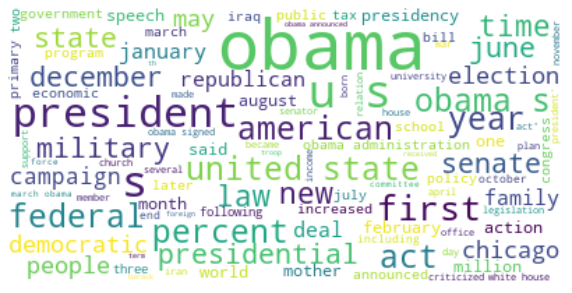

In [40]:
# Without removing stopwords
wordcloud = WordCloud(
                        background_color='white',
                        max_words=100,
                        max_font_size=50, 
                        random_state=42
                        ).generate(str(sentences))
fig = plt.figure(1)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Why did we do all this work

In [41]:
# reFetching the data
lame_text = ""
for paragraph in soup.find_all('p'): #The <p> tag defines a paragraph in the webpages
    lame_text += paragraph.text

In [42]:
    ###Doing the same without removing stop words or lemming
lame_sentences = nltk.sent_tokenize(lame_text)
lame_tokenized = [nltk.word_tokenize(sentence) for sentence in lame_sentences]

<Figure size 432x288 with 0 Axes>

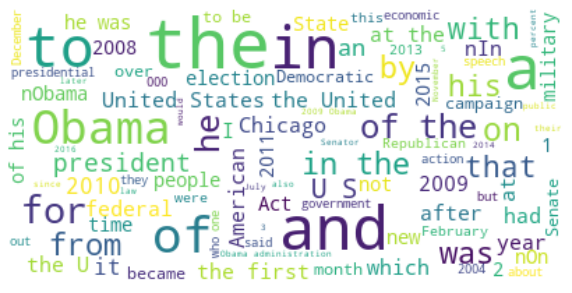

In [43]:
# REDO WORDCLOUD BUT WE SET STOPWORDS EMPTY
wordcloud = WordCloud(
                        background_color='white',
                        max_words=100,
                        max_font_size=50, 
                        random_state=42, ###SET STOPWORDS = [] and/or include_numbers = True or you will get the same thing!!!
                        stopwords = [],
                        include_numbers = True).generate(str(lame_sentences)) 
fig = plt.figure(1)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [44]:
# Training the Word2Vec model, but wrong
model = Word2Vec(lame_tokenized, min_count=1)

words = model.wv.index_to_key
print(words[:10])

[',', 'the', '[', ']', '.', 'of', 'in', 'and', 'to', 'a']


In [45]:
# Finding Word Vectors
vector = model.wv['president'] #get the vector of the word "global"
print(vector)

[-0.11300201  0.11360928  0.05625751  0.03218864  0.00869641 -0.21692751
  0.06753556  0.28762406 -0.11243377 -0.18464085  0.04791121 -0.26149356
 -0.01912937  0.0723279   0.01354559 -0.10805559  0.11217219 -0.1590023
 -0.00727    -0.32040107  0.08625188  0.07621483  0.14313951 -0.06332561
 -0.03948219  0.10829421 -0.13020343  0.00153408 -0.10245452 -0.00791564
  0.20229201 -0.01886254 -0.01611624 -0.17373459 -0.11044258  0.17323871
  0.08486327 -0.02853864 -0.08702251 -0.1881968   0.0444315  -0.13298422
 -0.09928566  0.0302094   0.0792958  -0.10169937 -0.15914045 -0.0215276
  0.11527775  0.16058409  0.09702297 -0.15373991 -0.08063399 -0.02781383
 -0.10714728  0.08848191  0.10807375 -0.08488362 -0.10307433  0.04733418
 -0.02154994  0.0259988   0.02423809 -0.01452748 -0.16494013  0.2007001
 -0.0237377   0.12603624 -0.1849697   0.10228344 -0.02849977  0.15404491
  0.19454563  0.0592561   0.18046004  0.09952319 -0.04153993  0.03036333
 -0.0633949  -0.02634128 -0.14224534 -0.04921436 -0.09

In [46]:
# Most similar words
similar1 = model.wv.most_similar('president')

similar2 = model.wv.most_similar('congress', topn=10) 

In [47]:
similar1, similar2

([(',', 0.9987039566040039),
  ('to', 0.9987033009529114),
  (']', 0.9986547231674194),
  ('[', 0.9986425042152405),
  ('at', 0.9986262917518616),
  ("'s", 0.9986180067062378),
  ('and', 0.9986137747764587),
  ('a', 0.998613178730011),
  ('of', 0.9986059665679932),
  ('in', 0.9985992312431335)],
 [('largest', 0.5590720176696777),
  ('Comprehensive', 0.5413334369659424),
  ('welfare', 0.5380709767341614),
  ('prevent', 0.5370659828186035),
  ('refused', 0.5333818793296814),
  ('cabinet', 0.5283961892127991),
  ('enacted', 0.526983916759491),
  ('winner', 0.5249868631362915),
  ('sexual', 0.5220809578895569),
  ('pace', 0.5215548872947693)])